In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
cols = ['sentiment','id','date','query_string','user','text']
df = pd.read_csv("../../../../Documents/Leuphana Study Materials/Projects/trainingandtestdata/training.1600000.processed.noemoticon.csv",
                 header=None, names=cols, encoding = "ISO-8859-1")
# above line will be different depending on where you saved your data, and your file name
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [5]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [6]:
df[df.sentiment == 0].head(10)


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,@Tatiana_K nope they didn't have it
9,0,@twittera que me muera ?


In [13]:
df[df.sentiment == 4].head(10)
df['pre_clean_len'] = [len(t) for t in df.text]

In [14]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'dataset_shape': (1600000, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


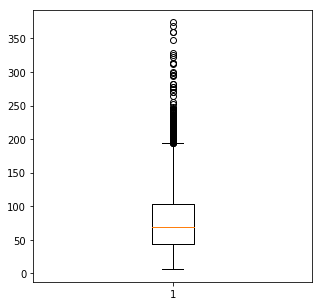

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [16]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [17]:
df.head()

,sentiment,text,pre_clean_len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [18]:
df.text[279]


"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [20]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. 


In [21]:
df.text[343]


'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [22]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [23]:
df.text[0]


"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [24]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])


"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [26]:
re.sub("[^a-zA-Z]", " ", df.text[175])


' machineplay I m so sorry you re having to go through this  Again    therapyfail'

### Data Cleaning Method to Clean the Data with - Beutifulsoup and Regex expressions

In [41]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

### Run Cleaning method for entire dataset

In [116]:
nums = [0,400000,800000,1200000,1600000]
print("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(0,1600000):
    if( (i+1)%20000 == 0 ):
        print("Tweets {} of {} has been processed".format(i+1, nums[1]))                                                                 
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 20000 of 400000 has been processed
Tweets 40000 of 400000 has been processed
Tweets 60000 of 400000 has been processed
Tweets 80000 of 400000 has been processed
Tweets 100000 of 400000 has been processed
Tweets 120000 of 400000 has been processed
Tweets 140000 of 400000 has been processed
Tweets 160000 of 400000 has been processed
Tweets 180000 of 400000 has been processed
Tweets 200000 of 400000 has been processed
Tweets 220000 of 400000 has been processed
Tweets 240000 of 400000 has been processed
Tweets 260000 of 400000 has been processed
Tweets 280000 of 400000 has been processed
Tweets 300000 of 400000 has been processed
Tweets 320000 of 400000 has been processed
Tweets 340000 of 400000 has been processed
Tweets 360000 of 400000 has been processed
Tweets 380000 of 400000 has been processed
Tweets 400000 of 400000 has been processed
Tweets 420000 of 400000 has been processed
Tweets 440000 of 400000 has been processed
Tweets 460000 of 40000

### Save the Cleaned Data

In [117]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [118]:
clean_df.to_csv('./clean_tweet.csv',encoding='utf-8')
csv = './clean_tweet.csv'

### Load the cleaned and processed data

In [119]:
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

/Users/gururaj/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [120]:
my_df[my_df.isnull().any(axis=1)].head()

,text,target
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0


In [121]:
np.sum(my_df.isnull().any(axis=1))

3717

In [122]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

In [123]:
df.iloc[my_df[my_df.isnull().any(axis=1)].index,:].head()

,sentiment,text,pre_clean_len
208,0,@mandayyy,10
249,0,@mandayyy,12
282,0,@ITS_NEMESIS -------,21
398,0,@danadearmond,14
430,0,@anistorm,10


In [124]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596283 entries, 0 to 1596282
Data columns (total 2 columns):
text      1596283 non-null object
target    1596283 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


## Generate World Cloud
### Negative Sentenses

In [125]:
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

In [126]:
from wordcloud import WordCloud

In [127]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)

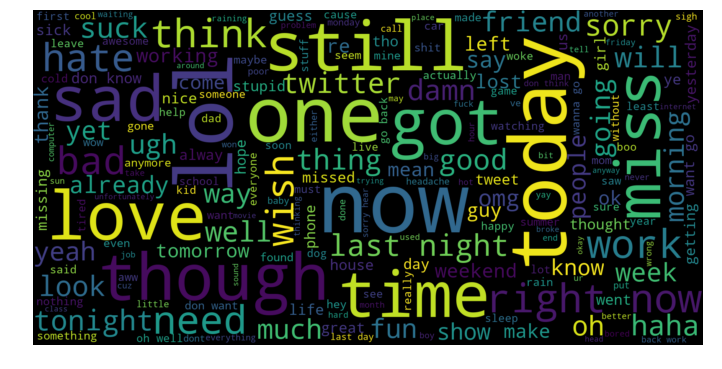

In [128]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [129]:
for t in neg_tweets.text[:200]:
    if 'love' in t:
        print(t)

ahh ive always wanted to see rent love the soundtrack
meh almost lover is the exception this track gets me depressed every time
awe i love you too am here i miss you
damn the grind is inspirational and saddening at the same time don t want you to stop cuz i like what u do much love
i m missing you babe but as long as your alive i m happy yawwwnn i m tired my love imma try to sleep hopefully you had a headstart
love the french i tell people here in the south i m qtr french and they snarl at me french are beautiful people


### Positive Sentiments

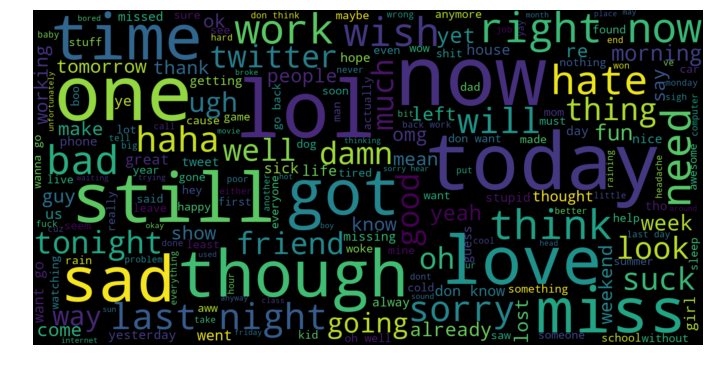

In [130]:
pos_tweets = my_df[my_df.target == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(str(t))
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Construct Matrix of All Uniq Words and Get Term Frequency of Each word from the positive and negative sentiment text

In [132]:
neg_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [133]:
term_freq_df.head()

,0,1
aa,123,0
aaa,70,0
aaaa,30,0
aaaaa,22,0
aaaaaa,13,0


In [134]:
document_matrix = cvec.transform(my_df.text)
my_df[my_df.target == 0].tail()

,text,target
798300,sick spending my day laying in bed listening to,0
798301,gmail is down,0
798302,rest in peace farrah so sad,0
798303,sounds like a rival is flagging your ads not m...,0
798304,has to resit exams over summer wishes he worke...,0


In [140]:
%%time
neg_batches = np.linspace(0,798179,1000).astype(int)
i=0
neg_tf = []
print(len(neg_batches)-1)
while i < len(neg_batches)-1:
    start = neg_batches[i]
    end = neg_batches[i+1]
    batch_result = np.sum(document_matrix[start:end].toarray(), axis=0)
    neg_tf.append(batch_result)
    if((i%10)==0):
        print(i)
    i += 1

999
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
CPU times: user 10min 7s, sys: 12min 40s, total: 22min 48s
Wall time: 23min 48s


In [141]:
%%time
pos_batches = np.linspace(798179,1596019,1000).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if((i%10)==0):
        print(i)
    i += 1

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
CPU times: user 9min 43s, sys: 12min 2s, total: 21min 46s
Wall time: 45min 36s


In [137]:
print("Done")

Done


In [142]:
neg = np.sum(neg_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1
aa,123,67
aaa,70,35
aaaa,30,20
aaaaa,22,9
aaaaaa,13,9


In [143]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313128,252512,565640
the,257854,265951,523805
my,190829,125971,316800
it,157470,147778,305248
and,153950,149623,303573
you,103881,198316,302197
is,128018,108920,236938
in,115523,101151,216674
for,98983,117350,216333
of,92722,91092,183814


## Data Visualization of All Words with their sentiments

Text(0.5, 1.0, 'Top 500 tokens in tweets')

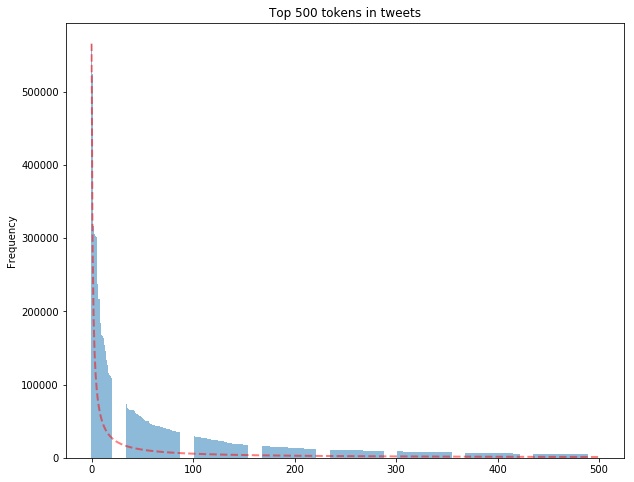

In [145]:
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

### loglog method

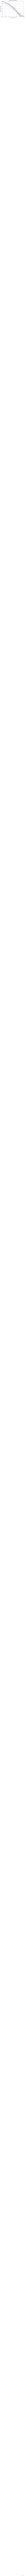

In [146]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

## Top 50 negative words graph

Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

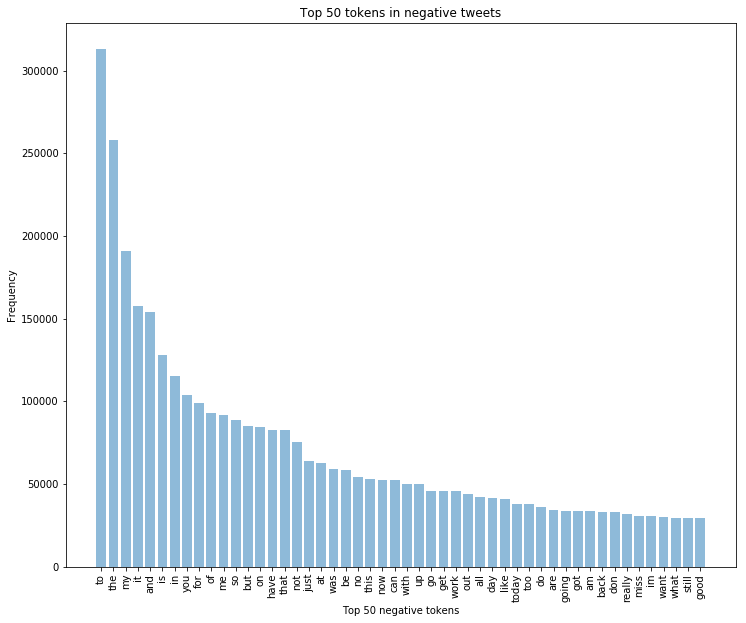

In [148]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative tweets')

## Positive words Frequency graph

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

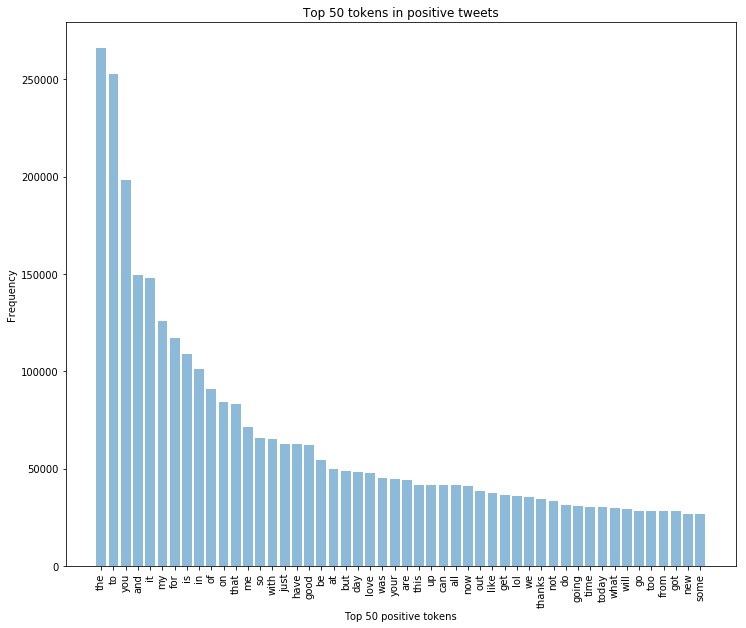

In [150]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive tweets')

## Plot Positive and Negative Words in Single Graph

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

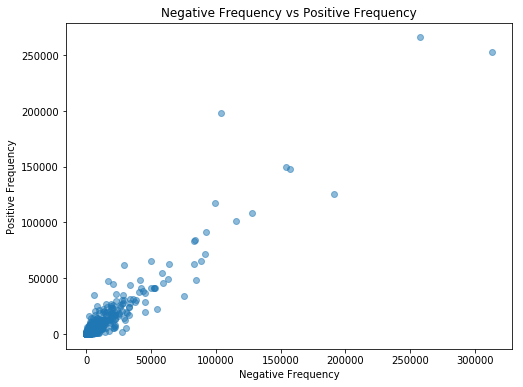

In [151]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

In [152]:
term_freq_df2 = term_freq_df

### Add variable pos_rate to get the amount of positivity word has

In [153]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

,negative,positive,total,pos_rate
seangarrtechno,0,1,1,1.0
nyarap,0,1,1,1.0
gamous,0,1,1,1.0
nyampeee,0,2,2,1.0
nyanyi,0,2,2,1.0
nyaow,0,1,1,1.0
nyappy,0,1,1,1.0
nyar,0,1,1,1.0
nyaranin,0,1,1,1.0
gammmmme,0,1,1,1.0


In [154]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct
the,257854,265951,523805,0.507729,0.029688
to,313128,252512,565640,0.446418,0.028188
you,103881,198316,302197,0.656247,0.022138
and,153950,149623,303573,0.492873,0.016703
it,157470,147778,305248,0.484124,0.016497
my,190829,125971,316800,0.397636,0.014062
for,98983,117350,216333,0.542451,0.013100
is,128018,108920,236938,0.459698,0.012159
in,115523,101151,216674,0.466835,0.011292
of,92722,91092,183814,0.495566,0.010169


## Add Harmonic Mean of Positive Words

In [176]:
from scipy.stats import hmean
term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']]) if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 else 0), axis=1)
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]


,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf
the,257854,265951,523805,0.507729,0.029688,0.056097,0.474912,1.0
to,313128,252512,565640,0.446418,0.028188,0.053028,0.418510,1.0
you,103881,198316,302197,0.656247,0.022138,0.042832,0.611387,1.0
and,153950,149623,303573,0.492873,0.016703,0.032310,0.461155,1.0
it,157470,147778,305248,0.484124,0.016497,0.031906,0.453074,1.0
my,190829,125971,316800,0.397636,0.014062,0.027164,0.374746,1.0
for,98983,117350,216333,0.542451,0.013100,0.025582,0.507153,1.0
is,128018,108920,236938,0.459698,0.012159,0.023691,0.430626,1.0
in,115523,101151,216674,0.466835,0.011292,0.022050,0.437165,1.0
of,92722,91092,183814,0.495566,0.010169,0.019928,0.463646,1.0


### Cumulative Distribution Function of Positive rate and Positive Frequency

In [178]:
from scipy.stats import norm

def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean',ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean
now,52616,41375,93991,0.440202,0.004619,0.009142,0.412864,1.0,1.0
they,25026,18350,43376,0.423045,0.002048,0.004077,0.397379,1.0,1.0
im,30671,19977,50648,0.394428,0.002230,0.004435,0.371918,1.0,1.0
think,21880,19521,41401,0.471510,0.002179,0.004338,0.441458,1.0,1.0
this,52991,41567,94558,0.439593,0.004640,0.009183,0.412312,1.0,1.0
better,10769,12471,23240,0.536618,0.001392,0.002777,0.501734,1.0,1.0
work,45416,19529,64945,0.300701,0.002180,0.004329,0.292860,1.0,1.0
how,20781,23388,44169,0.529512,0.002611,0.005196,0.495133,1.0,1.0
time,27525,30423,57948,0.525005,0.003396,0.006749,0.490946,1.0,1.0
hope,14677,19210,33887,0.566884,0.002144,0.004273,0.529825,1.0,1.0


In [181]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])                                                                if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0                                                                else 0), axis=1)
                                                       
term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='neg_normcdf_hmean', ascending=False).iloc[:10]

,negative,positive,total,pos_rate,pos_freq_pct,pos_hmean,pos_rate_normcdf,pos_freq_pct_normcdf,pos_normcdf_hmean,neg_rate,neg_freq_pct,neg_hmean,neg_rate_normcdf,neg_freq_pct_normcdf,neg_normcdf_hmean
been,20245,13396,33641,0.398205,0.001495,0.002980,0.375248,1.0,1.0,0.601795,0.002106,0.004197,0.624752,1.0,1.0
not,75051,33655,108706,0.309597,0.003757,0.007424,0.300024,1.0,1.0,0.690403,0.007808,0.015441,0.699976,1.0,1.0
or,15117,16829,31946,0.526795,0.001879,0.003744,0.492609,1.0,1.0,0.473205,0.001573,0.003135,0.507391,1.0,1.0
him,11444,8161,19605,0.416271,0.000911,0.001818,0.391308,1.0,1.0,0.583729,0.001191,0.002376,0.608692,1.0,1.0
all,42140,41434,83574,0.495776,0.004625,0.009165,0.463840,1.0,1.0,0.504224,0.004384,0.008692,0.536160,1.0,1.0
new,15507,26936,42443,0.634639,0.003007,0.005985,0.591970,1.0,1.0,0.365361,0.001613,0.003212,0.408030,1.0,1.0
more,18869,19055,37924,0.502452,0.002127,0.004236,0.470021,1.0,1.0,0.497548,0.001963,0.003910,0.529979,1.0,1.0
of,92722,91092,183814,0.495566,0.010169,0.019928,0.463646,1.0,1.0,0.504434,0.009646,0.018930,0.536354,1.0,1.0
you,103881,198316,302197,0.656247,0.022138,0.042832,0.611387,1.0,1.0,0.343753,0.010807,0.020955,0.388613,1.0,1.0
had,27809,20333,48142,0.422355,0.002270,0.004515,0.396759,1.0,1.0,0.577645,0.002893,0.005757,0.603241,1.0,1.0


Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

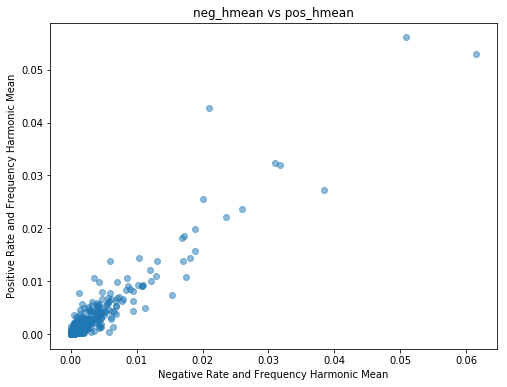

In [182]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

## Training Part

In [196]:
x = my_df.text
y = my_df.target
from sklearn.model_selection import train_test_split
SEED = 2000

In [197]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)

In [198]:
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [202]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


## Baseline Model - TextBlob

In [203]:
tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]

In [204]:
tbpred = [0 if n < 0 else 1 for n in tbresult]

In [205]:
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[1,0]))

In [209]:
confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])

In [210]:
print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print("-"*80)
print("Confusion Matrix\n")
print(confusion)
print("-"*80)
print("Classification Report\n")
print(classification_report(y_validation, tbpred))

Accuracy Score: 16.33%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                   0                   0
negative                5498                2607
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.77      0.32      0.45      8105
           1       0.00      0.00      0.00         0
           4       0.00      0.00      0.00      7858

   micro avg       0.16      0.16      0.16     15963
   macro avg       0.26      0.11      0.15     15963
weighted avg       0.39      0.16      0.23     15963



/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, wa

In [212]:
x_validation.head()

1428651    after swimming in santa monica beach now i m s...
836339                    i love your website very informing
586050                 wish i was in la for the laker parade
11182      finding it tough to do school work planning ma...
168313     i think i m gonna try to go vegetarian again a...
Name: text, dtype: object

In [214]:
y_validation.head()

1428651    4
836339     4
586050     0
11182      0
168313     0
Name: target, dtype: int64

In [215]:
x_test.head()

691314    indeed my son made me feel old too and i m noo...
264218    all your tweets about the mtv movie awards are...
560077    mornin i m so madd i missed tha real world cas...
646415     lmao erm i do loads im in it up untilll stronger
478637    we aren t machine met but we should act like a...
Name: text, dtype: object

In [219]:
tbresult[0:25]

[0.0,
 0.35,
 -0.25,
 -0.1701388888888889,
 0.28125,
 0.0,
 0.0,
 0.8,
 0.8,
 -0.1,
 0.0,
 0.5,
 0.15,
 0.0,
 -0.175,
 0.049999999999999996,
 0.0,
 -0.08333333333333336,
 -0.4,
 0.15000000000000002,
 -0.1875,
 0.26666666666666666,
 0.5,
 0.225,
 0.175]

# TF-IDF Feature Transformation and Training Classification

In [230]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time.time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time.time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [231]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()

def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_validation, y_validation, x_test, y_test)
        result.append((n,clf_accuracy,tt_time))
    return result

trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 50.23%
accuracy score: 76.34%
model is 26.10% more accurate than null accuracy
train and test time: 2.66s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 50.23%
accuracy score: 76.21%
model is 25.97% more accurate than null accuracy
train and test time: 2.59s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
  

/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.23%
accuracy score: 73.82%
model is 23.59% more accurate than null accuracy
train and test time: 2.47s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)


/Users/gururaj/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.23%
accuracy score: 75.21%
model is 24.97% more accurate than null accuracy
train and test time: 2.51s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
null accuracy: 50.23%
accuracy score: 72.46%
model is 22.23% more accurate than null accuracy
train and test time: 2.50s
--------------------------------------------------------------------------------


In [232]:
trigram_result

[('Logistic Regression', 0.7633903401616238, 2.6637539863586426),
 ('Linear SVC', 0.7620747979703063, 2.5893189907073975),
 ('LinearSVC with L1-based feature selection',
  0.7576896573325816,
  2.805100917816162),
 ('Multinomial NB', 0.7535550961598697, 2.2581639289855957),
 ('Bernoulli NB', 0.7529286474973376, 2.270719051361084),
 ('Ridge Classifier', 0.7632650504291173, 2.4384171962738037),
 ('AdaBoost', 0.6846457432813381, 6.341729164123535),
 ('Perceptron', 0.7382071039278331, 2.4733691215515137),
 ('Passive-Aggresive', 0.7520516193697927, 2.5108108520507812),
 ('Nearest Centroid', 0.7246131679508864, 2.5026421546936035)]

In [235]:
new_training_data = tvec.fit_transform(x_validation)

In [240]:
new_training_data.shape

(15963, 100000)